# Test 3

Leandro Jorge Fernández Vega

Download the dataset Company.csv from test03 (Promotion is target). If necessary, use random_state=10.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
                            cohen_kappa_score, roc_auc_score, det_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, LeaveOneOut, learning_curve, validation_curve
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('../content/Company.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Promotion
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  Promotion    400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Checking for missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
Promotion      0
dtype: int64

1. Build a decision tree model based on the default constructor. Evaluate the model.

In [5]:
# Encoding columns with non-integer values
le = LabelEncoder()
#Instead of 'number' we can use the specific type ('int64' in this case)
non_integer_columns = df.select_dtypes(exclude=['number']).columns

for attribute in non_integer_columns:
    df[attribute] = le.fit_transform(df[attribute])

df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Promotion
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


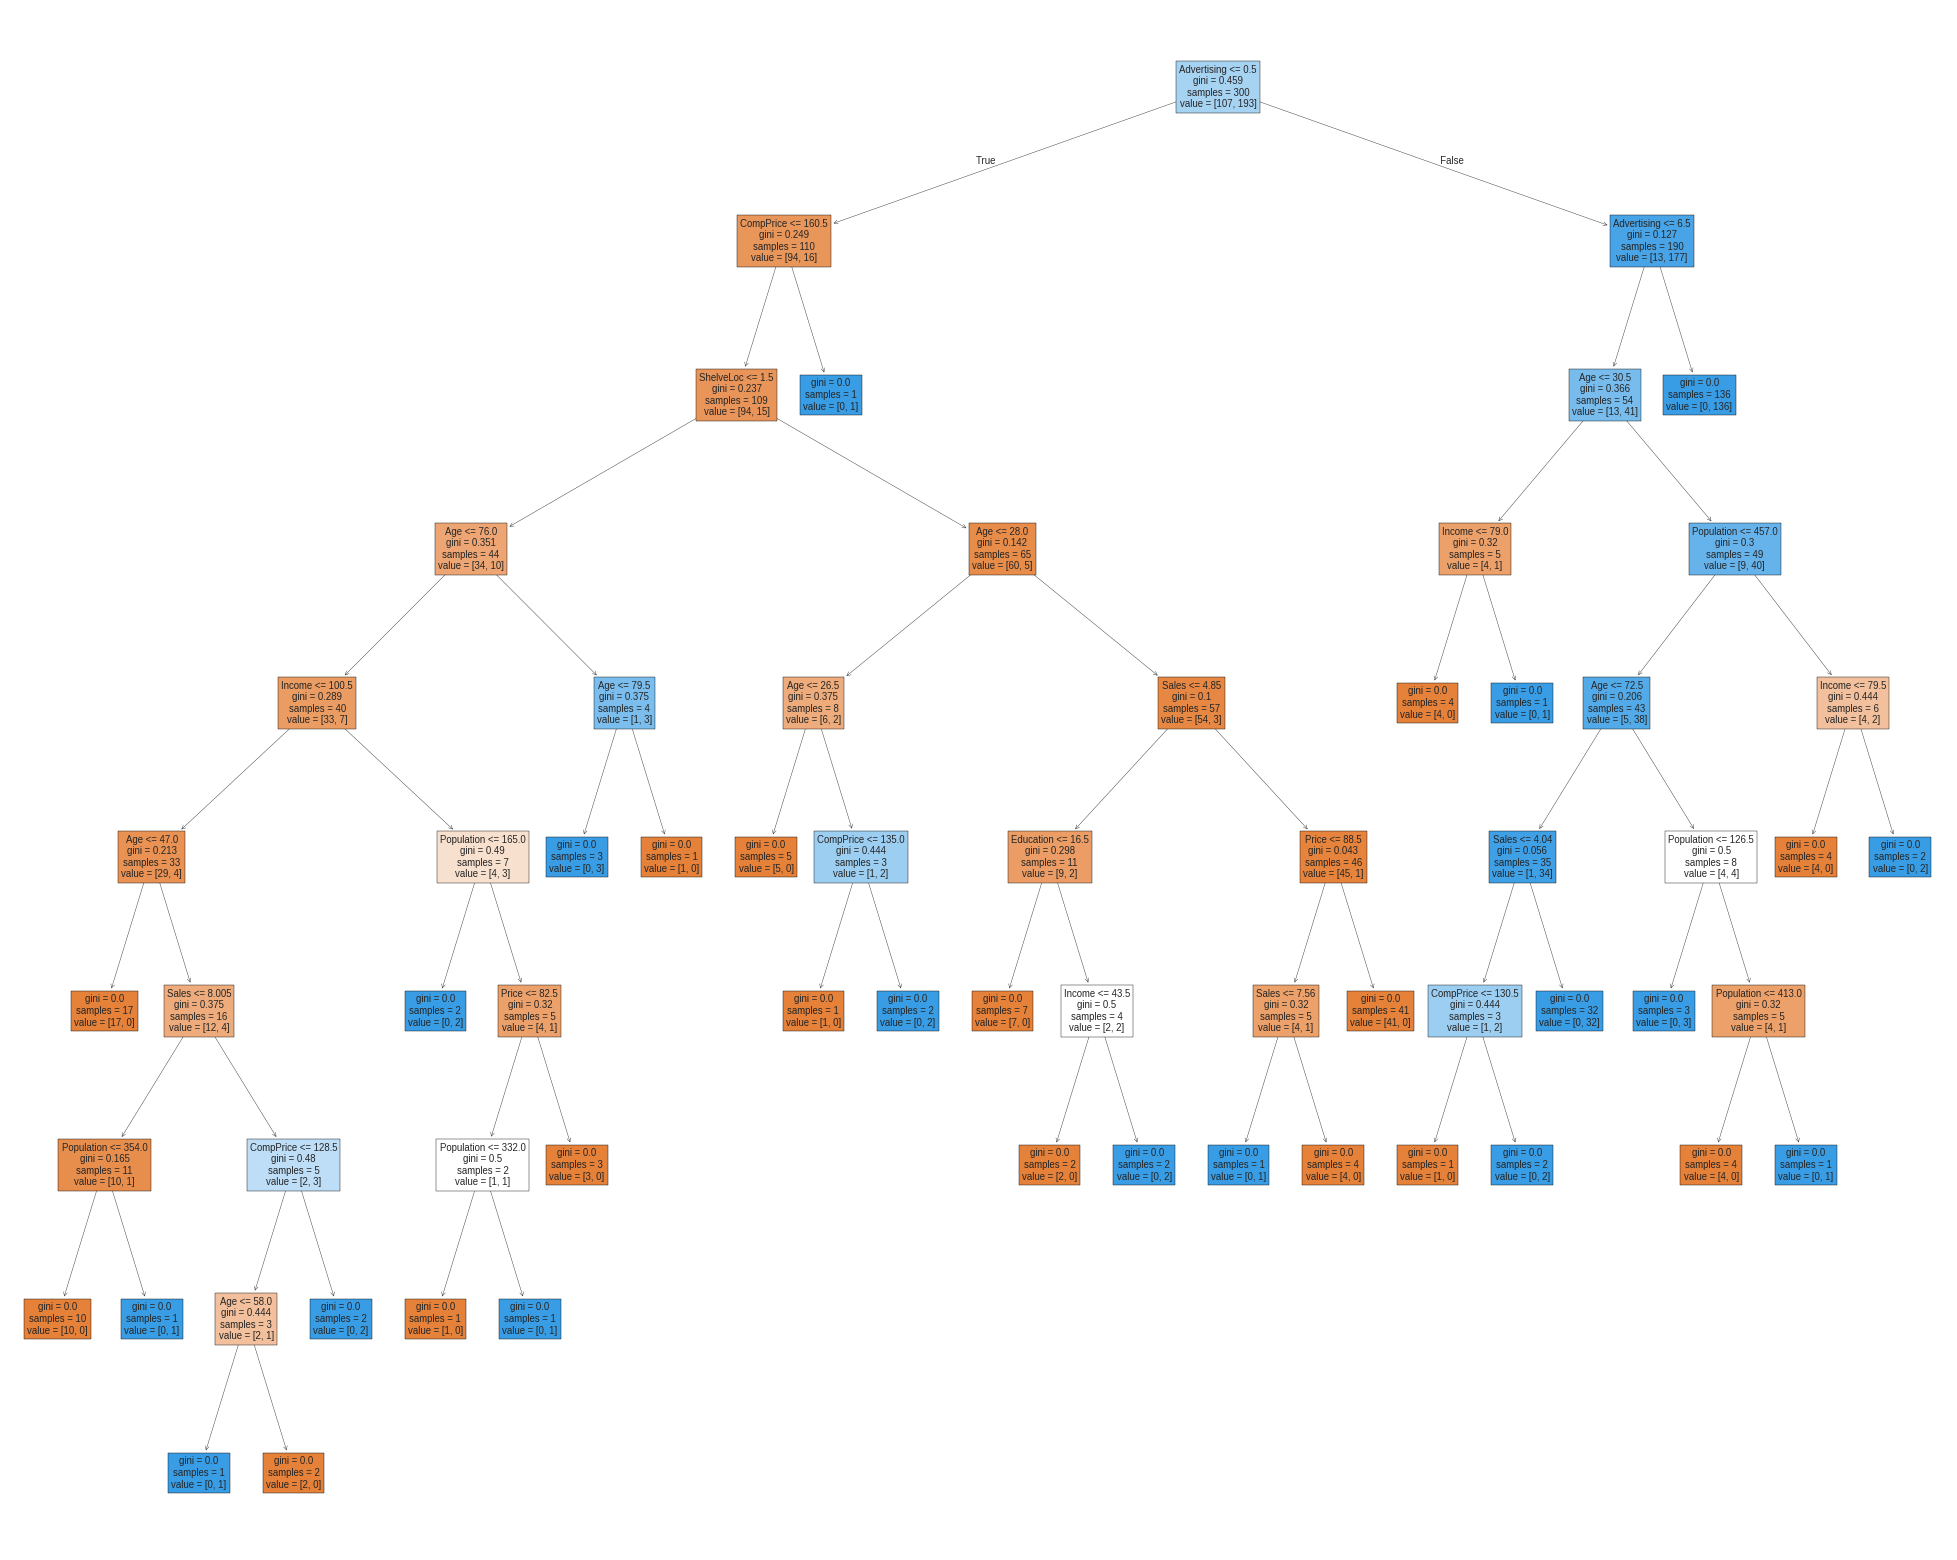

In [6]:
# Building the model
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=10)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

features = df.columns[:-1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                    feature_names=features,
                    filled=True,
                    )

In [7]:
#Evaluating the model

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred)) # <- Order is important

tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()

Accuracy Score:  0.86
Confusion Matrix
[[26  9]
 [ 5 60]]


Text(0, 0.5, 'Variable')

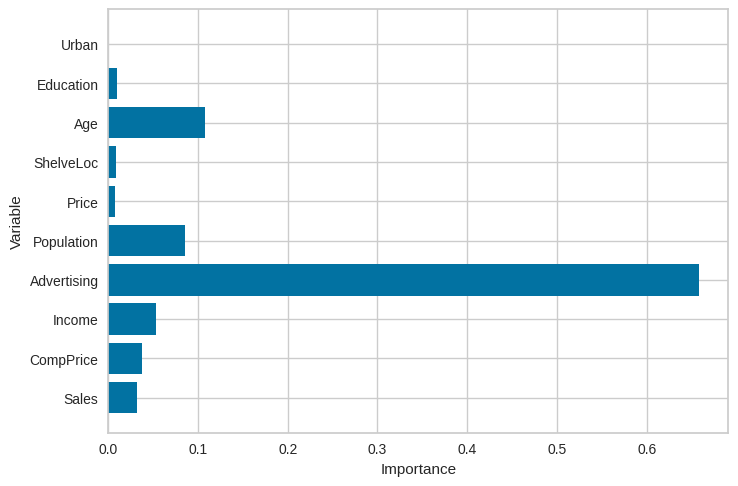

In [8]:
# Variable importance
plt.barh(range(features.size), list(model.feature_importances_), align='center')
plt.yticks(np.arange(features.size), features)
plt.xlabel("Importance")
plt.ylabel("Variable")

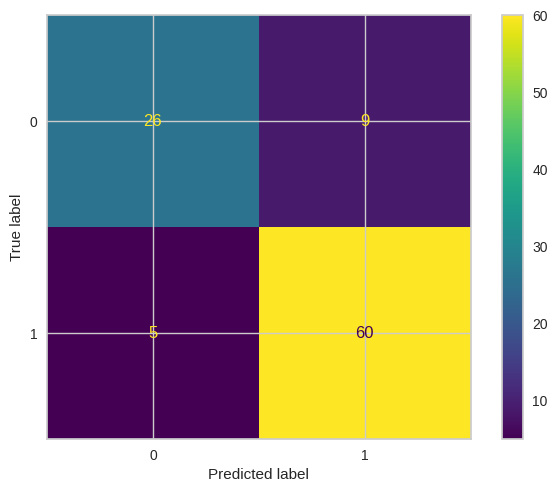

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [10]:
# Cross Validation Evaluation
score = cross_val_score(model, X_train, y_train, cv= 10, scoring="accuracy")
print('Scores for each fold are:', score)
print('Average score:',score.mean())

Scores for each fold are: [0.76666667 0.83333333 0.9        0.86666667 0.86666667 0.7
 0.76666667 0.83333333 0.8        0.8       ]
Average score: 0.8133333333333332


In [11]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['No(0)','Yes(1)']))
# Kappa Score
print("\nKappa Score: ",cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

       No(0)       0.84      0.74      0.79        35
      Yes(1)       0.87      0.92      0.90        65

    accuracy                           0.86       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.86      0.86      0.86       100


Kappa Score:  0.6839729119638827


/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


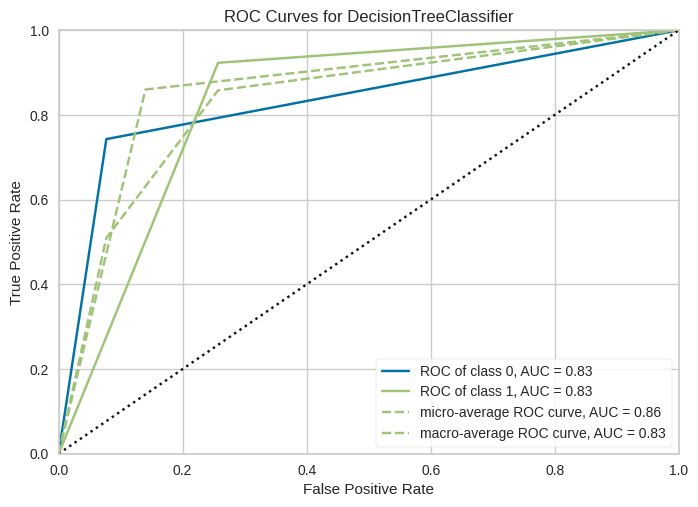

[1.         0.25714286]
[0.         0.07692308]
[0 1]


In [12]:
# ROC curve
vis = ROCAUC(model)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

fpr, fnr, thresholds = det_curve(y_test, y_pred)
# False Positive Rate
print(fpr)
# False Negative Rate
print(fnr)
# Thresholds for which the rates are calculated
print(thresholds)

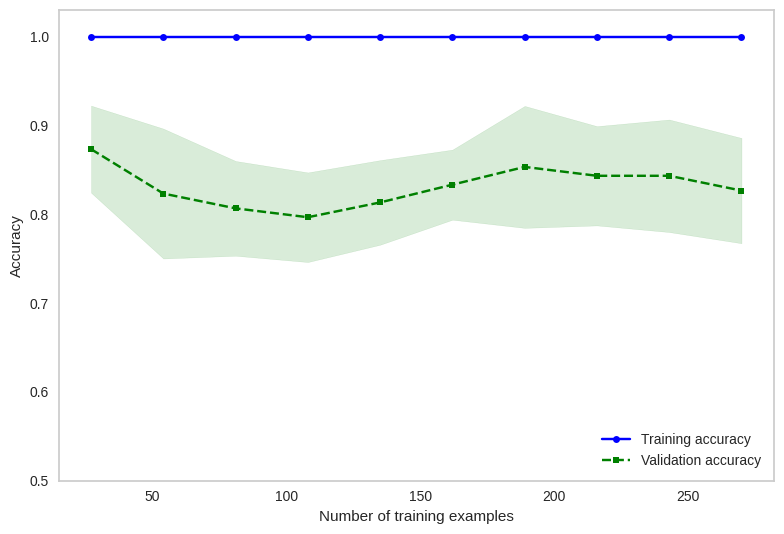

In [13]:
#Learning Curves
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model,
                                X=X_train,
                                y=y_train,
                                train_sizes=np.linspace(0.1, 1.0, 10),
                                cv=10,
                                n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation accuracy')

plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

We can see the model the testing accuracy is decent, but it is overfitted, due to the fact that the curves are very separated, consequence of a high variance.


2. Build a second decision tree model by setting the following parameters: the function measuring the quality of the split as entropy, maximum tree height equal to 3, minimum number of observations required at an internal node equal to 10.

In [14]:
model2=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42, min_samples_leaf=10)
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)

2.1. Present a visualisation of the tree you found.

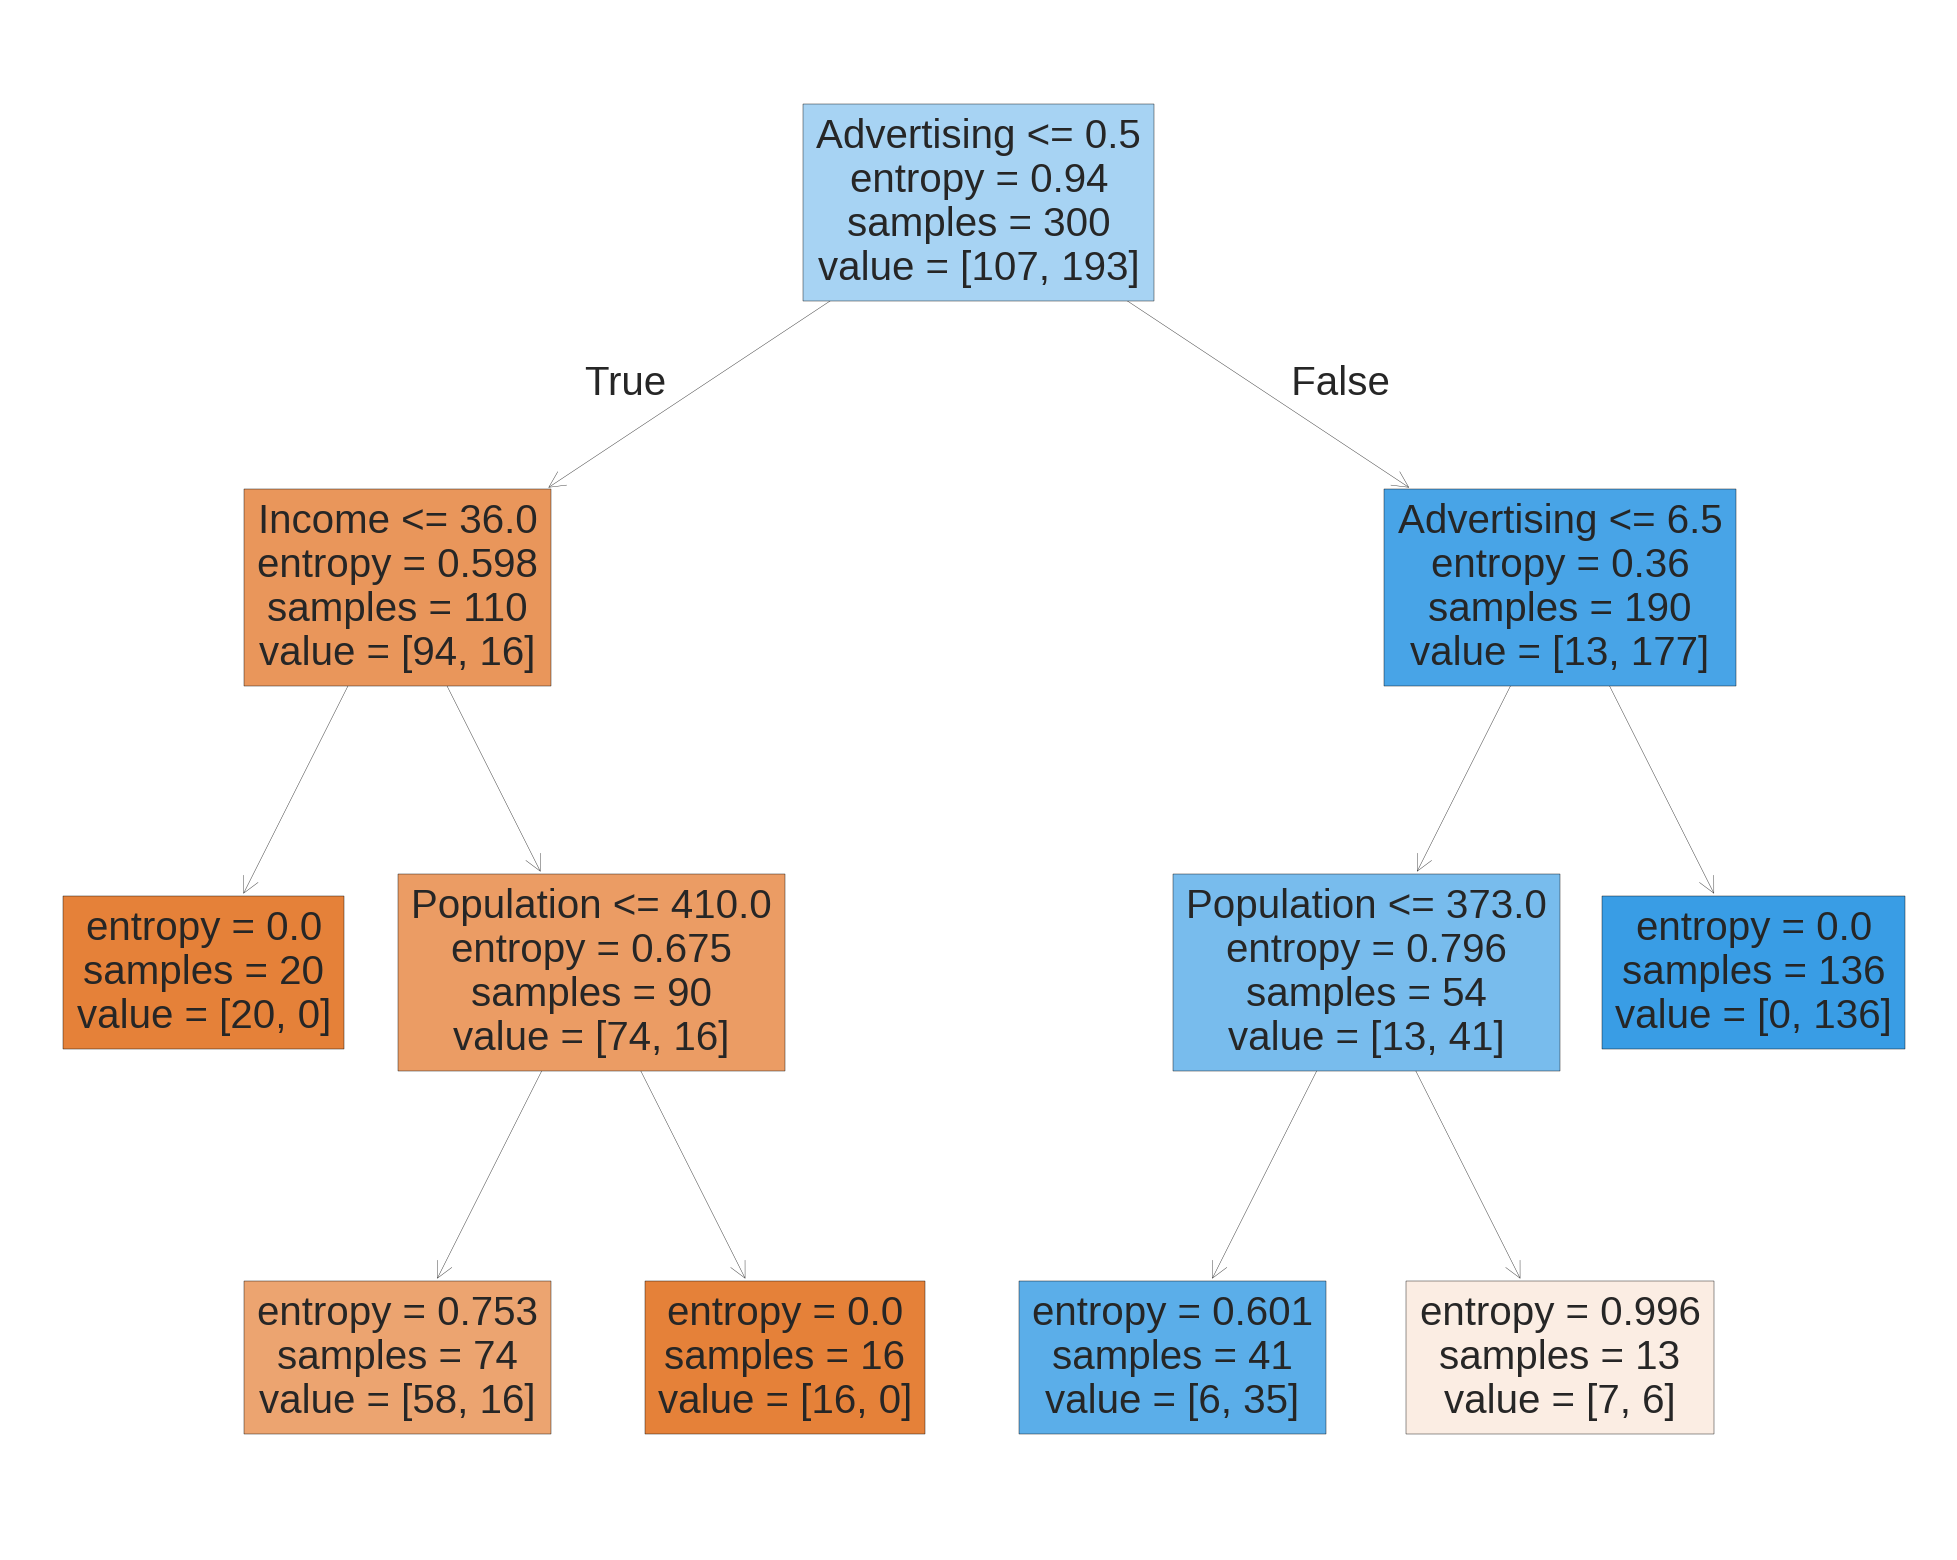

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2,
                    feature_names=features,
                    filled=True,
                    )

2.2. Evaluate the model.

In [16]:
#Evaluating the model

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred)) # <- Order is important

tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred).ravel()

Accuracy Score:  0.91
Confusion Matrix
[[32  3]
 [ 6 59]]


Text(0, 0.5, 'Variable')

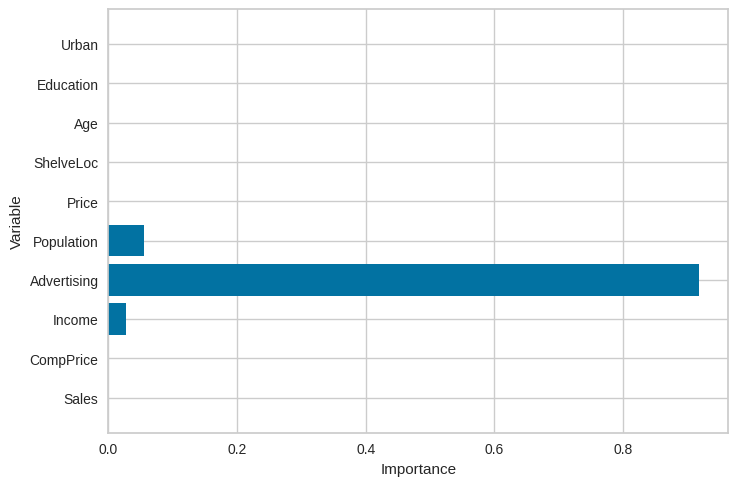

In [17]:
# Variable importance
plt.barh(range(features.size), list(model2.feature_importances_), align='center')
plt.yticks(np.arange(features.size), features)
plt.xlabel("Importance")
plt.ylabel("Variable")

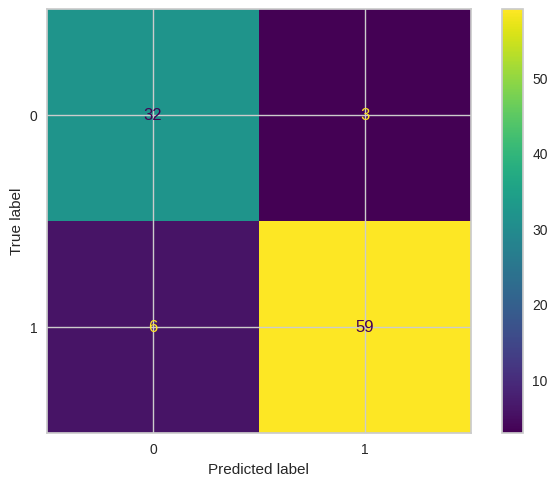

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot()
plt.show()

In [19]:
# Cross Validation Evaluation
score = cross_val_score(model2, X_train, y_train, cv= 10, scoring="accuracy")
print('Scores for each fold are:', score)
print('Average score:',score.mean())

Scores for each fold are: [0.83333333 0.86666667 0.93333333 0.93333333 0.9        0.9
 0.9        0.96666667 0.8        0.86666667]
Average score: 0.8900000000000002


In [20]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['No(0)','Yes(1)']))
# Kappa Score
print("\nKappa Score: ",cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

       No(0)       0.84      0.91      0.88        35
      Yes(1)       0.95      0.91      0.93        65

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100


Kappa Score:  0.8060344827586207


/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


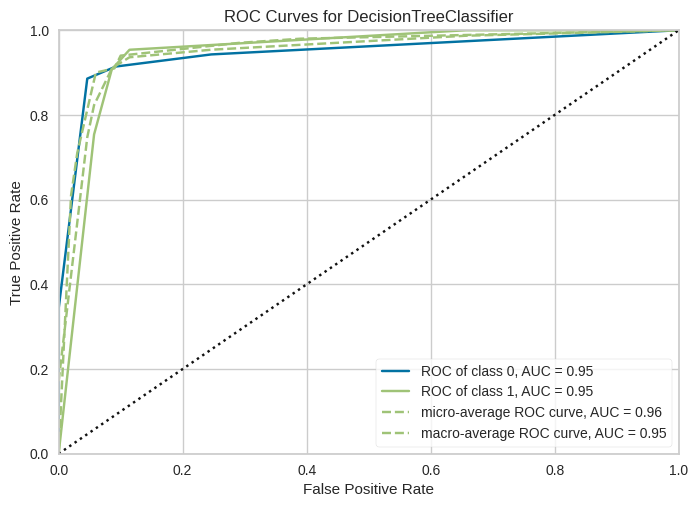

[1.         0.08571429]
[0.         0.09230769]
[0 1]


In [21]:
# ROC curve
vis = ROCAUC(model2)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

fpr, fnr, thresholds = det_curve(y_test, y_pred)
# False Positive Rate
print(fpr)
# False Negative Rate
print(fnr)
# Thresholds for which the rates are calculated
print(thresholds)

2.3. Check the trade-off between bias and variance, use appropriate curves.

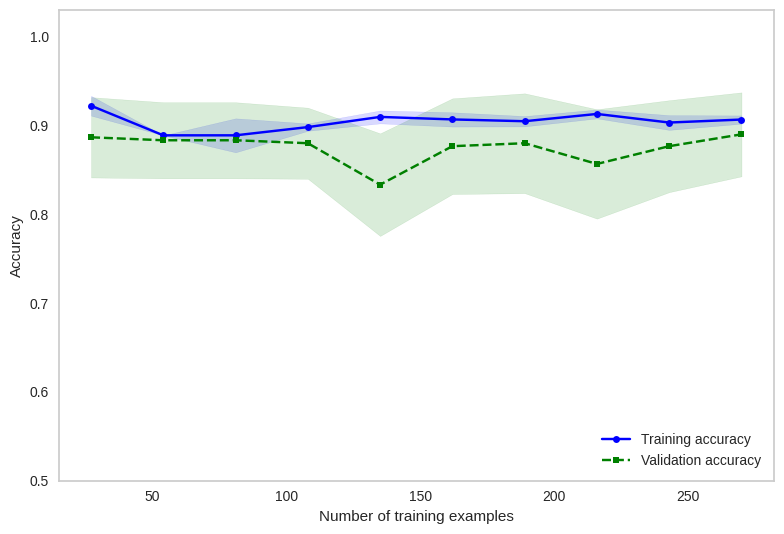

In [22]:
#Learning Curves
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model2,
                                X=X_train,
                                y=y_train,
                                train_sizes=np.linspace(0.1, 1.0, 10),
                                cv=10,
                                n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Validation accuracy')

plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

We can see the model has pretty good accuracy, so it is not underfitted. However, we can find a high intravariance regarding thetest set, but low intervariance between training and testing.

3. Which parameters among :  functions measuring the quality of the split, maximum tree height (2,3,5,7) and minimum number of observations required at an internal node equal (5,10,25,50), based on a 5-fold cross-validation, are best in the second model? List them. Draw the ROC curve for this model.

In [23]:
param_grid = {
    'criterion' :['entropy','gini'],
    'max_depth':[2,3,5,7],
    'min_samples_leaf':[5,10,15,20]
}

# scoring is the metric that will be used to evaluate the model
# refit=True means that the best model will be refitted with the training sets
# cv is the number of folds
gs = GridSearchCV(estimator=model2,
                param_grid=param_grid,
                scoring='accuracy',
                refit=True,
                cv=5)
gs = gs.fit(X_train, y_train)
# The best score using cross validation
print(gs.best_score_)
# The best score using just the test set
print(gs.score(X_test, y_test))
print(gs.best_params_)

best_estimator = gs.best_estimator_
y_pred = best_estimator.predict(X_test)

0.8966666666666667
0.93
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}


/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


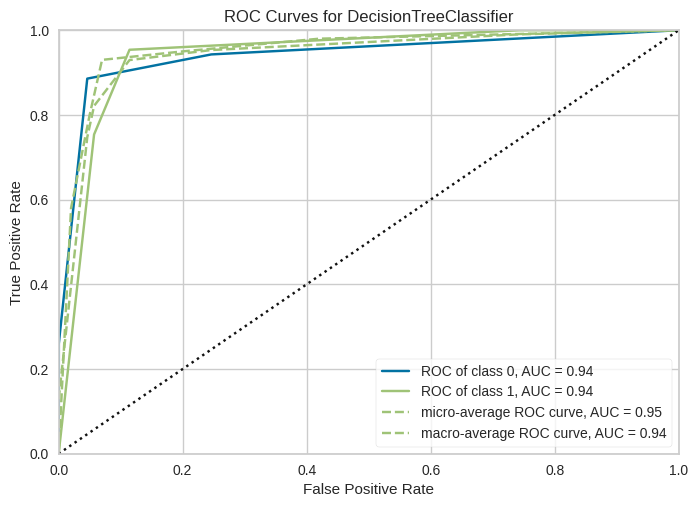

[1.         0.11428571]
[0.         0.04615385]
[0 1]


In [24]:
# ROC curve
vis = ROCAUC(best_estimator)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

fpr, fnr, thresholds = det_curve(y_test, y_pred)
# False Positive Rate
print(fpr)
# False Negative Rate
print(fnr)
# Thresholds for which the rates are calculated
print(thresholds)

Complete answer.

In [26]:
# See classification report: Precision, Yes(1)
print("The proportion of positive instances that are correctly classified")
print("by the first tree is equal = ", 0.87,"(from task 1)")
print("by the second tree is equal = ",0.95 ,"(from task 2)")


The proportion of positive instances that are correctly classified
by the first tree is equal =  0.87 (from task 1)
by the second tree is equal =  0.95 (from task 2)
